# Explore Sonora Bobcat data file format and spectral appearance

Follow the instructions in the `models/` directory to download the Sonora-Bobcat pre-computed synthetic models.  
You should see fits files in the `spectra/` subfolder:

In [1]:
! ls ../models/spectra/ | head -n 10

parameters
sp_t1000g1000nc_m0.0.gz
sp_t1000g100nc_m0.0.gz
sp_t1000g10nc_m0.0.gz
sp_t1000g1780nc_m0.0.gz
sp_t1000g178nc_m0.0.gz
sp_t1000g17nc_m0.0.gz
sp_t1000g3160nc_m0.0.gz
sp_t1000g316nc_m0.0.gz
sp_t1000g31nc_m0.0.gz
ls: write error: Broken pipe


You can plot these:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
import glob
import seaborn as sns
sns.set_context('paper')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
file_paths = glob.glob('../models/spectra/sp_t*.gz')

There are 429 spectra, each one is evaluated at a different temperature and surface gravity.

In [4]:
len(file_paths)

429

Pick one of the files at random:

In [5]:
fn = file_paths[321]

The models contain two columns:

|wavelength ($\mu m$)|flux (erg / cm$^2$ / s / Hz)|
|--|--|
|0.40 - 50| $>0$|

In [6]:
df_native = pd.read_csv(fn, 
                        skiprows=[0, 1], 
                        delim_whitespace=True, 
                        compression='gzip',
                        names=['wavelength', 'flux']
                       ).sort_values('wavelength').reset_index(drop=True)

In [7]:
df_native.head()

,wavelength,flux
0,0.400006,3.205670e-14
1,0.400014,3.167810e-14
2,0.400022,3.170920e-14
3,0.400030,3.156740e-14
4,0.400038,3.139460e-14


There are over a third of a million wavelength points in the native spectrum!

In [8]:
df_native.shape

(361594, 2)

Let's truncate the spectrum to the near-infrared region: $\lambda = 1-2.5 \; \mu m$.  We will use [numpy boolean masking](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html):

In [9]:
nir_mask = (df_native.wavelength > 1.0) & (df_native.wavelength < 2.5)
df_nir = df_native[nir_mask]

In [10]:
df_nir.shape

(183259, 2)

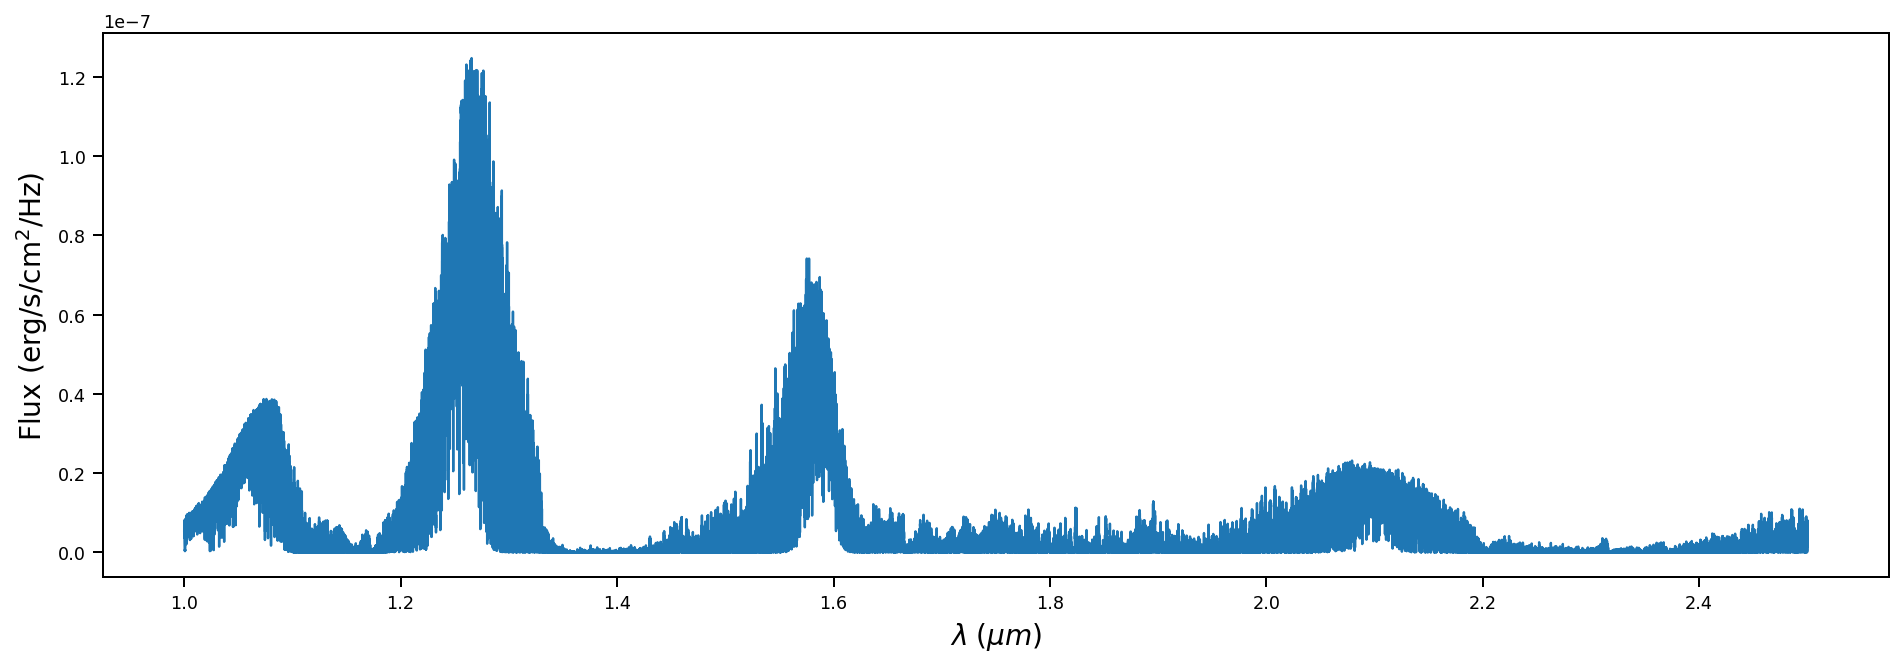

In [11]:
plt.figure(figsize=(16, 5))
plt.plot(df_nir.wavelength, df_nir.flux)
plt.xlabel('$\lambda \; (\mu m)$', fontsize=14); 
plt.ylabel('Flux $(\mathrm{erg/s/cm^2/Hz})$', fontsize=14);

Great! Let's stop there for now and we can move on to try to make these figures interactive in the next notebook.